# Άσκηση 6

Πραγματικός αριθμός συστάδων (true_k): 4
k=2, silhouette_score=0.574
k=3, silhouette_score=0.725
k=4, silhouette_score=0.730
k=5, silhouette_score=0.601

Καλύτερο k σύμφωνα με το silhouette_score: 4
Το silhouette_score εντόπισε σωστά τον πραγματικό αριθμό συστάδων!


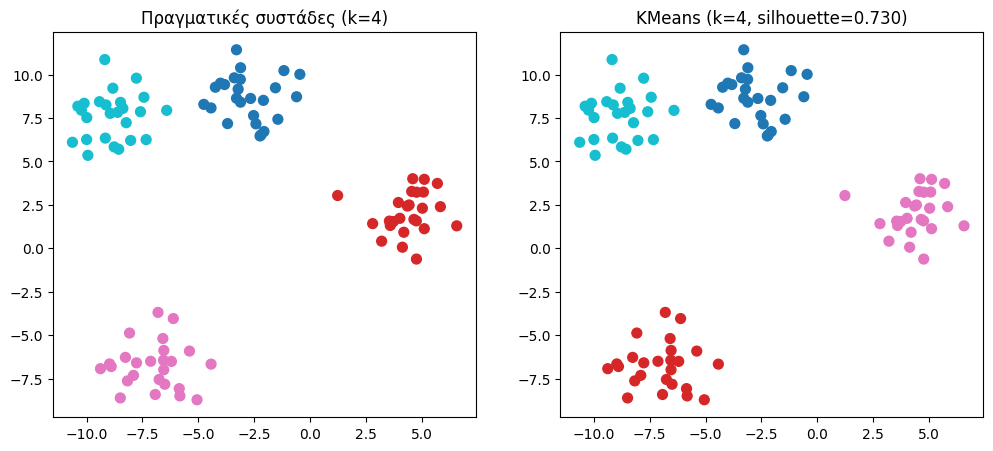

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

seed = 42

# Δημιουργία συνθετικών δεδομένων
np.random.seed(seed)
true_k = np.random.randint(2, 6) # Τυχαίος πραγματικός αριθμός συστάδων μεταξύ 2 και 5
X, y_true = make_blobs(
    n_samples=100,
    centers=true_k,
    cluster_std=1.3,
    random_state=seed
)

print(f"Πραγματικός αριθμός συστάδων (true_k): {true_k}")

# Εφαρμογή KMeans για κάθε k από 2 έως 4 και υπολογισμός silhouette_score
scores = {}
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=seed, n_init="auto")
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    scores[k] = score
    print(f"k={k}, silhouette_score={score:.3f}")

# Εύρεση του "καλύτερου" k
best_k = max(scores, key=scores.get)
print(f"\nΚαλύτερο k σύμφωνα με το silhouette_score: {best_k}")

if best_k == true_k:
    print("Το silhouette_score εντόπισε σωστά τον πραγματικό αριθμό συστάδων!")
else:
    print("Το silhouette_score δεν εντόπισε σωστά τον πραγματικό αριθμό συστάδων.")

# Οπτικοποίηση αποτελεσμάτων
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Αριστερά: οι πραγματικές συστάδες
axs[0].scatter(X[:, 0], X[:, 1], c=y_true, cmap="tab10", s=50)
axs[0].set_title(f"Πραγματικές συστάδες (k={true_k})")

# Δεξιά: οι συστάδες από το καλύτερο KMeans
best_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init="auto")
y_pred = best_kmeans.fit_predict(X)
axs[1].scatter(X[:, 0], X[:, 1], c=y_pred, cmap="tab10", s=50)
axs[1].set_title(f"KMeans (k={best_k}, silhouette={scores[best_k]:.3f})")

plt.show()
